In [27]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle
# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# traigo mis funciones
import sys

sys.path.append('../src') #pongo los 2 puntos para que salga de la carpeta
import soporte_funciones as sf
import soporte_encoding as se

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from category_encoders import TargetEncoder

pd.set_option('display.max_columns', None)

In [28]:
df = pd.read_csv('../datos_1/df_resultados_sin_out.csv', index_col=0)
df.head()

,price,propertyType,size_stand,exterior,rooms,bathrooms,distance_stand,status,floor,hasLift
0,750.0,flat,0.011443,True,1,1,-0.714088,good,3,True
1,750.0,flat,0.432212,True,2,1,-0.040932,good,bj,False
2,590.0,flat,0.432212,True,3,2,2.948728,good,Desconocido,False
3,684.0,studio,-0.619710,True,0,1,-0.446614,Desconocido,Desconocido,Desconocido
4,600.0,flat,0.558443,True,2,1,1.505006,good,3,False


In [29]:
df['rooms'] = df['rooms'].astype(str)
df['bathrooms'] = df['bathrooms'].astype(str)

In [30]:
df['exterior'] = df['exterior'].astype(str)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           341 non-null    float64
 1   propertyType    341 non-null    object 
 2   size_stand      341 non-null    float64
 3   exterior        341 non-null    object 
 4   rooms           341 non-null    object 
 5   bathrooms       341 non-null    object 
 6   distance_stand  341 non-null    float64
 7   status          341 non-null    object 
 8   floor           341 non-null    object 
 9   hasLift         341 non-null    object 
dtypes: float64(3), object(7)
memory usage: 29.3+ KB


In [32]:
df_num, df_cat = sf.separar_dataframe(df)

In [33]:
lista_col_categ =  df.select_dtypes(include='O').columns.tolist()

Index(['propertyType', 'exterior', 'rooms', 'bathrooms', 'status', 'floor',
       'hasLift'],
      dtype='object')


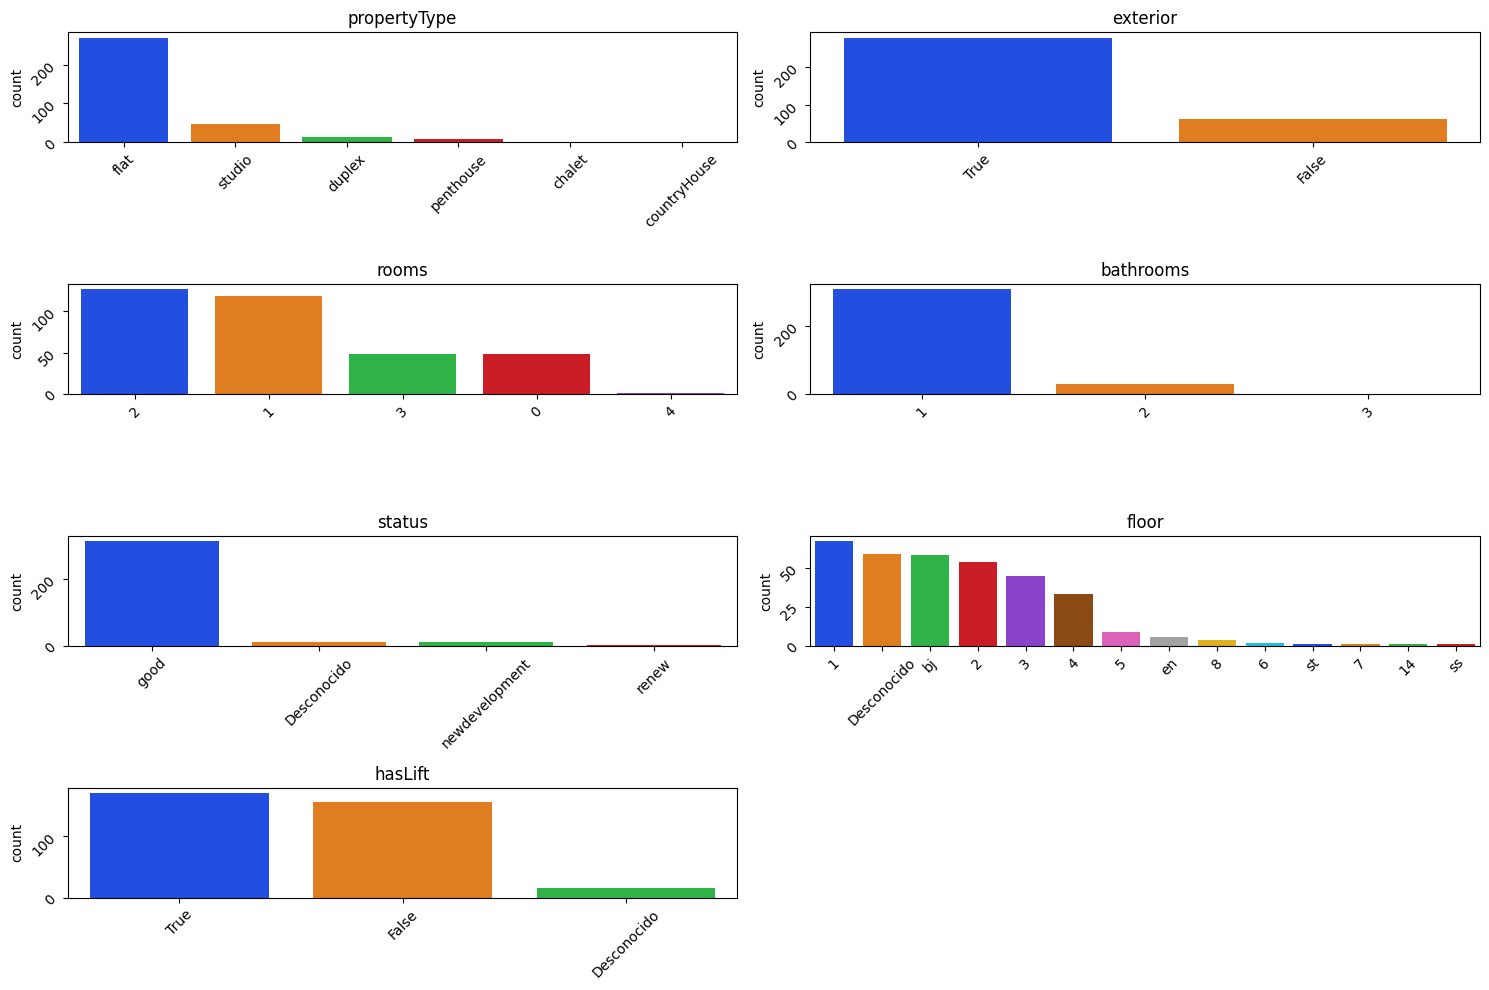

In [34]:
sf.plot_categoricas(df_cat)

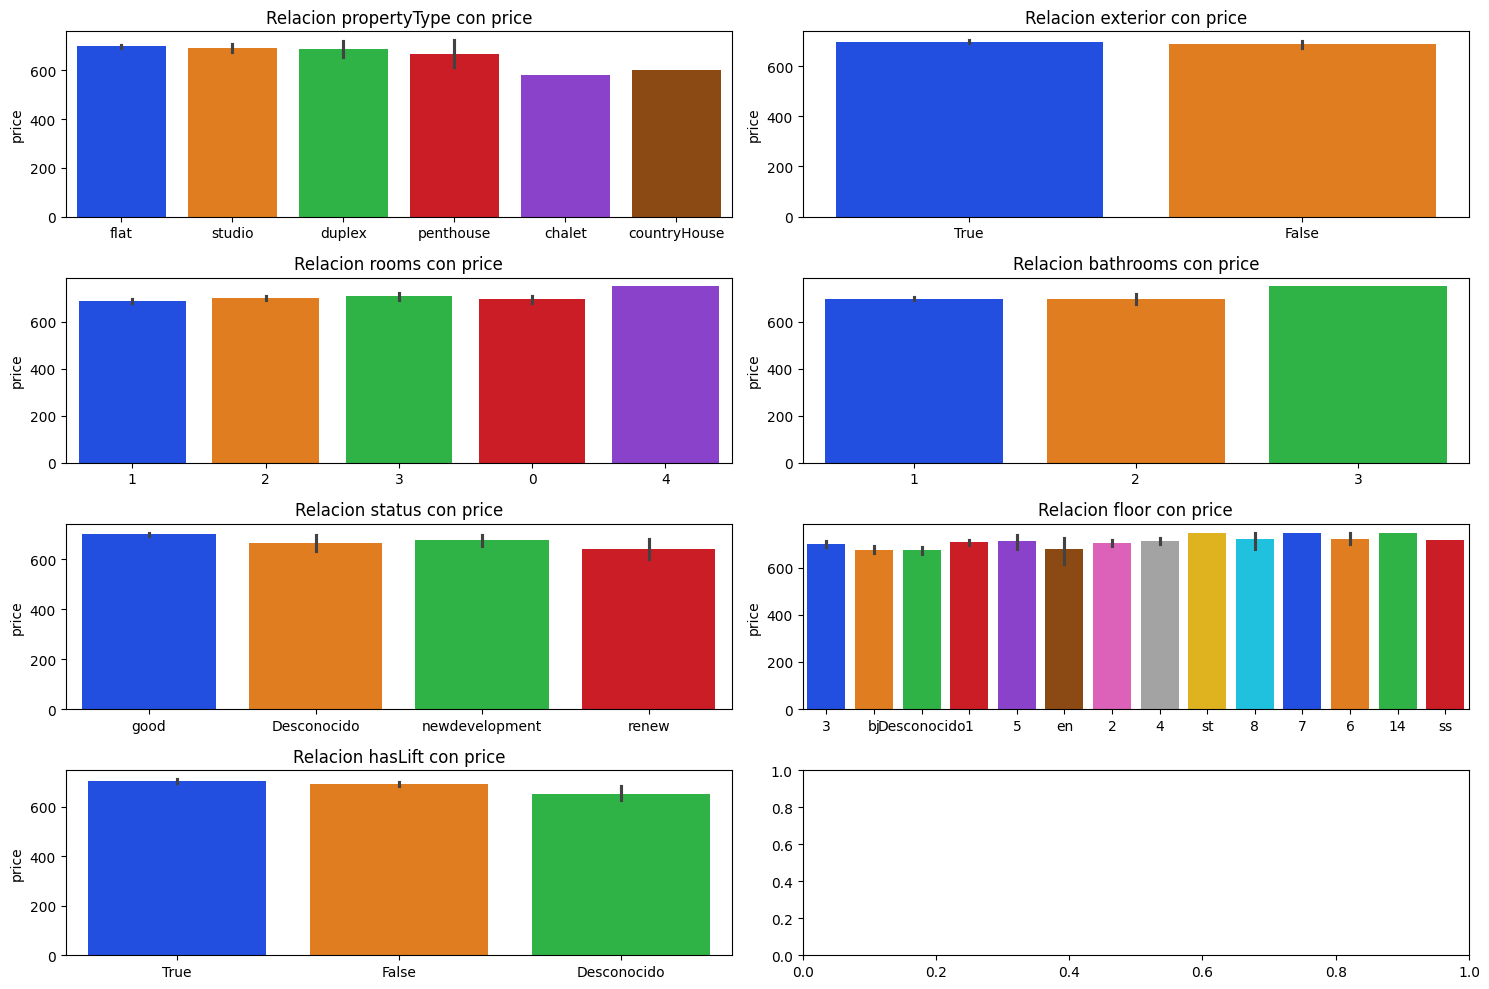

In [35]:
sf.visualizar_categoricas(df, lista_col_categ, 'price', tipo_grafica='barplot')

In [36]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'studio', 'duplex', 'penthouse', 'chalet', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 5.669761379211929
Valor p: 0.33968969845856084
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,20.0000,0.9998,-196.0496,236.0496,chalet-countryHouse
1,109.2857,0.3555,-48.8464,267.4178,chalet-duplex
2,120.0148,0.2190,-33.0380,273.0676,chalet-flat
3,88.6250,0.6205,-73.4122,250.6622,chalet-penthouse
4,113.6596,0.2845,-40.7272,268.0464,chalet-studio
5,89.2857,0.5869,-68.8464,247.4178,countryHouse-duplex
6,100.0148,0.4207,-53.0380,253.0676,countryHouse-flat
7,68.6250,0.8299,-93.4122,230.6622,countryHouse-penthouse
8,93.6596,0.5071,-60.7272,248.0464,countryHouse-studio
9,10.7291,0.9775,-31.1456,52.6038,duplex-flat



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 9316.5
Valor p: 0.33759763225979667
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,9.5341,0.2076,-5.3176,24.3857,False-True



###########################

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3', '0', '4']

Realizando test de Kruskal...
Estadístico de prueba: 9.181278599435299
Valor p: 0.056724693351905976
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-6.9011,0.9435,-32.0225,18.2203,0-1
1,7.2698,0.9302,-17.6199,32.1595,0-2
2,14.3750,0.6813,-15.5784,44.3284,0-3
3,55.1667,0.8458,-93.0949,203.4282,0-4
4,14.1710,0.2367,-4.6274,32.9693,1-2
5,21.2761,0.1402,-3.8453,46.3975,1-3
6,62.0678,0.7768,-85.2935,209.4291,1-4
7,7.1052,0.9354,-17.7845,31.9949,2-3
8,47.8968,0.8999,-99.4252,195.2188,2-4
9,40.7917,0.9432,-107.4699,189.0532,3-4



###########################

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3']

Realizando test de Kruskal...
Estadístico de prueba: 1.7939173731419331
Valor p: 0.4078080477150463
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-1.9882,0.9791,-25.8947,21.9183,1-2
1,52.6570,0.5930,-74.4410,179.7549,1-3
2,54.6452,0.5788,-74.2781,183.5684,2-3



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'Desconocido', 'newdevelopment', 'renew']

Realizando test de Kruskal...
Estadístico de prueba: 12.771899084205414
Valor p: 0.005156774270207851
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,37.3814,0.0647,-1.5174,76.2802,Desconocido-good
1,13.6923,0.9134,-40.2109,67.5955,Desconocido-newdevelopment
2,-22.6154,0.9439,-126.9985,81.7678,Desconocido-renew
3,-23.6891,0.3958,-62.5879,15.2097,good-newdevelopment
4,-59.9968,0.3863,-157.4822,37.4886,good-renew
5,-36.3077,0.8058,-140.6908,68.0754,newdevelopment-renew



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', 'Desconocido', '1', '5', 'en', '2', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de Kruskal...
Estadístico de prueba: 31.638012731078778
Valor p: 0.00271734974996769
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,41.7463,0.9999,-136.3196,219.8122,1-14
1,-2.4945,1.0000,-34.8182,29.8293,1-2
2,-6.2982,1.0000,-40.3648,27.7684,1-3
3,7.3523,1.0000,-30.2374,44.9421,1-4
4,6.1907,1.0000,-56.5590,68.9404,1-5
...,...,...,...,...,...
86,41.6552,0.9999,-136.6138,219.9241,bj-ss
87,71.6552,0.9858,-106.6138,249.9241,bj-st
88,40.8333,1.0000,-150.0804,231.7470,en-ss
89,70.8333,0.9931,-120.0804,261.7470,en-st



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'Desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 10.989484061506401
Valor p: 0.0041083161480806795
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,40.5218,0.0134,6.8972,74.1464,Desconocido-False
1,51.8431,0.0009,18.3402,85.3461,Desconocido-True
2,11.3213,0.1311,-2.4694,25.1121,False-True



###########################



In [37]:
df

,price,propertyType,size_stand,exterior,rooms,bathrooms,distance_stand,status,floor,hasLift
0,750.0,flat,0.011443,True,1,1,-0.714088,good,3,True
1,750.0,flat,0.432212,True,2,1,-0.040932,good,bj,False
2,590.0,flat,0.432212,True,3,2,2.948728,good,Desconocido,False
3,684.0,studio,-0.619710,True,0,1,-0.446614,Desconocido,Desconocido,Desconocido
4,600.0,flat,0.558443,True,2,1,1.505006,good,3,False
...,...,...,...,...,...,...,...,...,...,...
336,640.0,flat,0.390135,True,2,1,0.932143,good,2,True
337,700.0,flat,-0.241018,True,1,1,-0.372706,good,1,True
338,700.0,flat,-0.030634,True,1,1,-0.677725,good,6,True
339,700.0,flat,0.642596,True,2,1,1.009599,good,1,False


In [38]:
# diccionario_encoding = {"onehot": ['propertyType', 'exterior', 'rooms', 'bathrooms'], # no metemos ninguna columna porque todas nuestras columnas tienen orden
#                         "dummies": [], # no metemos ninguna columna porque todas tienen orden
#                         'ordinal' : {
#                                     },
#                         "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
#                         "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
#                         "target": ["status", "floor", "hasLift"]
#                         }

In [39]:

# # instanciamos la clase de OneHot
# one_hot_encoder = OneHotEncoder()

# # transformamos los datos de las columnas almacenadas en la variable col_code
# trans_one_hot = one_hot_encoder.fit_transform(self.dataframe[col_encode])

# # el objeto de la transformación del OneHot es necesario convertilo a array (con el método toarray()), para luego convertilo a DataFrame
# # además, asignamos el valor de las columnas usando el método get_feature_names_out()
# oh_df = pd.DataFrame(trans_one_hot.toarray(), columns=one_hot_encoder.get_feature_names_out())

# # concatenamos los resultados obtenidos en la transformación con el DataFrame original
# self.dataframe = pd.concat([self.dataframe.reset_index(drop=True), oh_df.reset_index(drop=True)], axis=1)


In [40]:
# encoding = se.Encoding(df, diccionario_encoding, "price")
# df_encode = encoding.one_hot_encoding()
# df_encode.head()

In [41]:
# with open('onehot_encoder.pkl', 'wb') as f:
#     pickle.dump(encoding, f)

In [42]:
# df_encode.shape

In [43]:
# encoder = TargetEncoder(cols = df_encode.select_dtypes("O").columns)
# df_final = encoder.fit_transform(X = df_encode, y = df["price"])

In [44]:
# df_final.head()

In [45]:
# columnas_eliminar = ['propertyType', 'exterior', 'rooms', 'bathrooms']

In [46]:
# df_final.drop(columns=columnas_eliminar, inplace=True)

In [47]:
# with open('target_encoder.pkl', 'wb') as f:
#     pickle.dump(encoder, f)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
import pandas as pd
import pickle

# Diccionario de columnas para codificar
diccionario_encoding = {
    "onehot": ['propertyType', 'exterior', 'rooms', 'bathrooms'],
    "target": ['status', 'floor', 'hasLift']
}

### Paso 1: One-Hot Encoding
# Instanciar y ajustar el OneHotEncoder
one_hot_encoder = OneHotEncoder()
trans_one_hot = one_hot_encoder.fit_transform(df[diccionario_encoding["onehot"]])

# Convertir la salida en un DataFrame
oh_df = pd.DataFrame(trans_one_hot.toarray(), columns=one_hot_encoder.get_feature_names_out(diccionario_encoding["onehot"]))

# Concatenar el DataFrame codificado con el original y eliminar las columnas originales
df_encoded = pd.concat([df.reset_index(drop=True), oh_df.reset_index(drop=True)], axis=1).drop(columns=diccionario_encoding["onehot"])

# Guardar el OneHotEncoder en un archivo pickle
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)

### Paso 2: Target Encoding
# Instanciar y aplicar el TargetEncoder
target_encoder = TargetEncoder(cols=diccionario_encoding["target"])
df_encoded = target_encoder.fit_transform(X=df_encoded, y=df["price"])

# Guardar el TargetEncoder en un archivo pickle
with open('target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

### Paso 3: Eliminar columnas codificadas en Target Encoding
# Estas columnas ya fueron transformadas
# df_encoded.drop(columns=diccionario_encoding["target"], inplace=True)

# Visualizar el DataFrame final
print(df_encoded.head())


   price  size_stand  distance_stand      status       floor     hasLift  \
0  750.0    0.011443       -0.714088  699.996805  701.603662  704.776468   
1  750.0    0.432212       -0.040932  699.996805  678.759957  693.455133   
2  590.0    0.432212        2.948728  699.996805  675.974382  693.455133   
3  684.0   -0.619710       -0.446614  685.802390  675.974382  680.560184   
4  600.0    0.558443        1.505006  699.996805  701.603662  693.455133   

   propertyType_chalet  propertyType_countryHouse  propertyType_duplex  \
0                  0.0                        0.0                  0.0   
1                  0.0                        0.0                  0.0   
2                  0.0                        0.0                  0.0   
3                  0.0                        0.0                  0.0   
4                  0.0                        0.0                  0.0   

   propertyType_flat  propertyType_penthouse  propertyType_studio  \
0                1.0         

In [51]:
one_hot_encoder

OneHotEncoder()

In [49]:
df_encoded

,price,size_stand,distance_stand,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
0,750.0,0.011443,-0.714088,699.996805,701.603662,704.776468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,0.432212,-0.040932,699.996805,678.759957,693.455133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,590.0,0.432212,2.948728,699.996805,675.974382,693.455133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,684.0,-0.619710,-0.446614,685.802390,675.974382,680.560184,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,600.0,0.558443,1.505006,699.996805,701.603662,693.455133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,640.0,0.390135,0.932143,699.996805,705.486603,704.776468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
337,700.0,-0.241018,-0.372706,699.996805,708.155153,704.776468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
338,700.0,-0.030634,-0.677725,699.996805,701.243619,704.776468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
339,700.0,0.642596,1.009599,699.996805,708.155153,693.455133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [50]:
# df_final.to_csv('..\\datos_1\\df_final.csv')